In [1]:
import sys
import os
current_path = os.getcwd()  # 获取当前工作目录
print("当前路径:", current_path)
current_path = current_path.replace('/samples', '')
print(sys.path)  # 显示所有模块搜索路径
sys.path.append(current_path)  # 添加自定义路径
print(sys.path)  # 显示所有模块搜索路径

def plot_fig(data):
    #1. 创建画布（调整大小适应大量曲线）
    plt.figure(figsize=(15, 8), dpi=100)
    
    # 2. 绘制所有折线（优化显示效果）
    for i, arr in enumerate(data):
        plt.plot(arr, 
                 linewidth=0.9,  # 细线避免重叠
                 alpha=0.3,      # 半透明区分重叠曲线
                 # color='blue'  # 统一颜色
                 ) 
    
    # 3. 添加图表元素
    plt.title(f"Curves Visualization", fontsize=14)
    plt.xlabel("Index", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.5)  # 辅助网格线
    
    # 4. 显示/保存
    plt.tight_layout()  # 自动调整间距
    # plt.savefig('massive_lines.png', bbox_inches='tight')  # 保存高清图片
    plt.show()


当前路径: /Users/yang/PycharmProjects/Option/samples
['/Users/yang/PycharmProjects/Option/samples', '/Users/yang/PycharmProjects/Option', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/opt/anaconda3/lib/python3.12/site-packages', '/opt/anaconda3/lib/python3.12/site-packages/aeosa']
['/Users/yang/PycharmProjects/Option/samples', '/Users/yang/PycharmProjects/Option', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/opt/anaconda3/lib/python3.12/site-packages', '/opt/anaconda3/lib/python3.12/site-packages/aeosa', '/Users/yang/PycharmProjects/Option']


In [2]:
import numpy as np
import QuantLib as ql
import matplotlib.pyplot as plt

from src.QlCalendar import QlCalendar
from src.QlStocks import QlStocks
from src.QlVanillaOptions import QlVanillaOptions


In [3]:
S0 = 100
strike = 100
r = 0.05
T=1
paths = 100
steps = 100
steps = 251
sigma = 0.3

In [4]:
start_date = ql.Date(1, 1, 2023)
ql_calendar = QlCalendar(init_date=start_date, init_risk_free_rate=r)
end_date = ql_calendar.cal_date_advance(times=steps, time_unit='days')

today:  January 3rd, 2023


In [5]:
print(end_date)
print(ql_calendar.day_counter.dayCount(start_date, end_date))

January 9th, 2024
251


In [6]:
stock_1 = QlStocks(ql_calendar)
stock_1.black_scholes([S0] * paths, sigma=sigma)

,codes,price_quote,dividend_quote,process_types,processes
0,tmp_1,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,None,black_schole,<QuantLib.QuantLib.BlackScholesProcess; proxy ...
1,tmp_2,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,None,black_schole,<QuantLib.QuantLib.BlackScholesProcess; proxy ...
2,tmp_3,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,None,black_schole,<QuantLib.QuantLib.BlackScholesProcess; proxy ...
3,tmp_4,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,None,black_schole,<QuantLib.QuantLib.BlackScholesProcess; proxy ...
4,tmp_5,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,None,black_schole,<QuantLib.QuantLib.BlackScholesProcess; proxy ...
...,...,...,...,...,...
95,tmp_96,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,None,black_schole,<QuantLib.QuantLib.BlackScholesProcess; proxy ...
96,tmp_97,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,None,black_schole,<QuantLib.QuantLib.BlackScholesProcess; proxy ...
97,tmp_98,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,None,black_schole,<QuantLib.QuantLib.BlackScholesProcess; proxy ...
98,tmp_99,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,None,black_schole,<QuantLib.QuantLib.BlackScholesProcess; proxy ...


In [7]:
options = QlVanillaOptions(stock_1.df)
options.european_option(
    'call',
    strike,
    end_date
)

/Users/yang/PycharmProjects/Option/src/QlVanillaOptions.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.stocks_df['key'] = 1


,codes,price_quote,processes,strike_prices,maturity_dates,types,payoff,maturity,engines,options
0,tmp_1,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,<QuantLib.QuantLib.BlackScholesProcess; proxy ...,100,"January 9th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticEuropeanEngine; pro...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
1,tmp_2,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,<QuantLib.QuantLib.BlackScholesProcess; proxy ...,100,"January 9th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticEuropeanEngine; pro...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
2,tmp_3,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,<QuantLib.QuantLib.BlackScholesProcess; proxy ...,100,"January 9th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticEuropeanEngine; pro...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
3,tmp_4,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,<QuantLib.QuantLib.BlackScholesProcess; proxy ...,100,"January 9th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticEuropeanEngine; pro...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
4,tmp_5,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,<QuantLib.QuantLib.BlackScholesProcess; proxy ...,100,"January 9th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticEuropeanEngine; pro...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
...,...,...,...,...,...,...,...,...,...,...
95,tmp_96,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,<QuantLib.QuantLib.BlackScholesProcess; proxy ...,100,"January 9th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticEuropeanEngine; pro...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
96,tmp_97,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,<QuantLib.QuantLib.BlackScholesProcess; proxy ...,100,"January 9th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticEuropeanEngine; pro...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
97,tmp_98,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,<QuantLib.QuantLib.BlackScholesProcess; proxy ...,100,"January 9th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticEuropeanEngine; pro...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
98,tmp_99,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,<QuantLib.QuantLib.BlackScholesProcess; proxy ...,100,"January 9th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticEuropeanEngine; pro...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...


In [8]:
# # test if fulfills put-call parity


In [9]:
# print(options.NPV() - option_put.NPV() - (S0 - strike * np.exp(-r * T)))

npv = options.NPV()
delta = options.delta()


In [10]:
process = stock_1.df.loc[0, 'processes']
path_list = stock_1.stock_paths(paths=paths, date_param=steps, process=process)


使用步数: 251 步
timesteps: 251, Time length(per year): 0.996031746031746start_date: January 3rd, 2023 end_date: January 9th, 2024


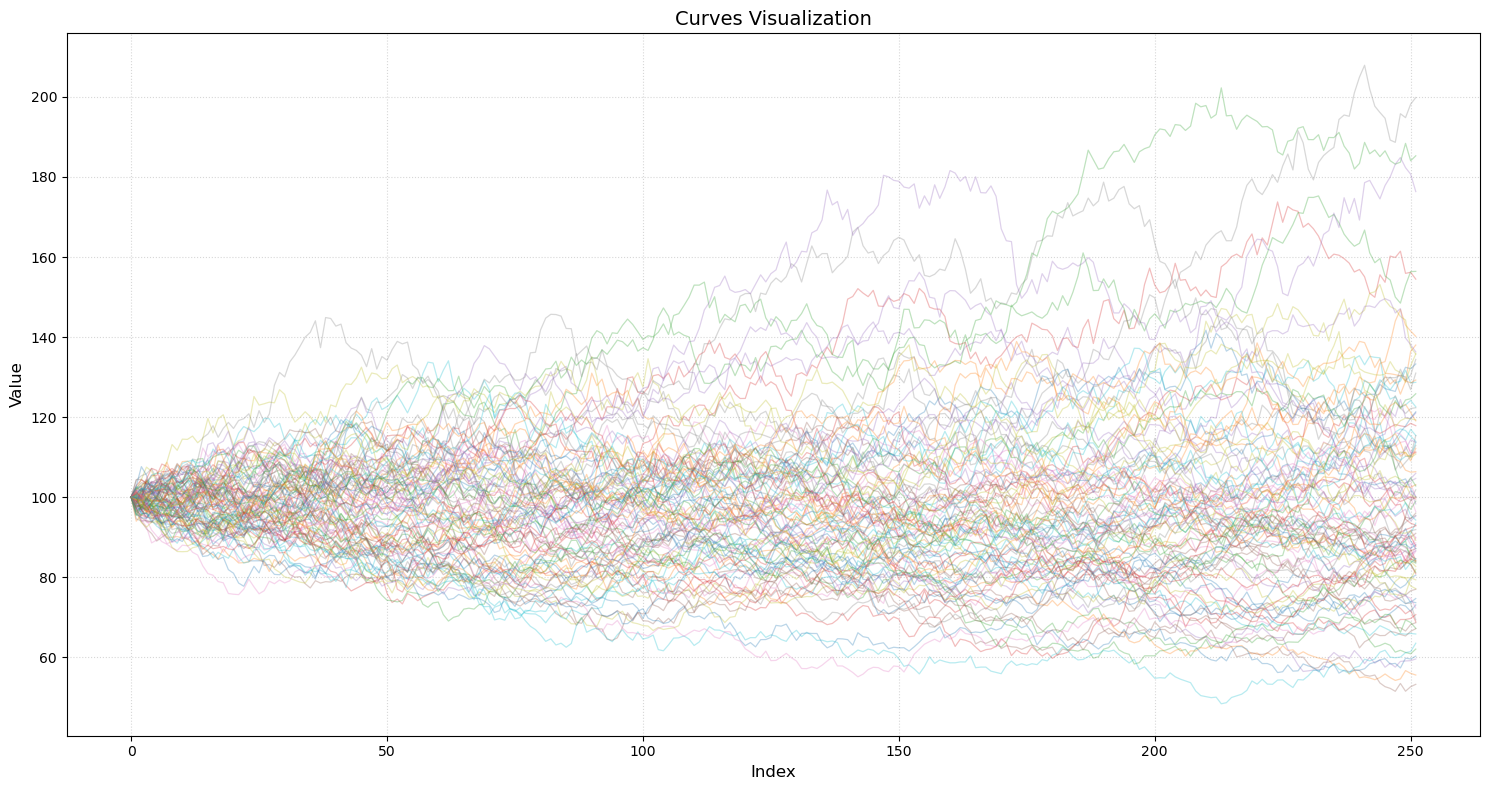

In [11]:
plot_fig(path_list)

In [12]:
# 动态对冲模拟
# 初始化数组
dt = 1 / steps
time_points = np.arange(0, 1 + dt, dt)
portfolio = np.zeros((steps+1, paths))
cash = np.zeros((steps+1, paths))
option_values = np.zeros((steps+1, paths))
deltas = np.zeros((steps+1, paths))

In [13]:
# 初始计算
option_values[0] = options.NPV()['NPV']
deltas[0] = options.delta()['delta']
cash[0] = option_values[0] * 100 - deltas[0] * S0
portfolio[0] = -option_values[0] * 100 + deltas[0] * S0


In [14]:
option_values[0][0], deltas[0][0]

(14.199081682335763, 0.6240130668560548)

In [15]:
cash

array([[1357.50686155, 1357.50686155, 1357.50686155, ..., 1357.50686155,
        1357.50686155, 1357.50686155],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [16]:
all_trade_dates = [ql_calendar.today]
for t in range(1, steps):
    # 设置价格
    ql_calendar.to_next_trading_date()
    print(ql_calendar.today)
    all_trade_dates.append(ql_calendar.today)
    stock_1.set_prices([p[t] for p in path_list])
    #
    option_values[t] = options.NPV()['NPV']
    deltas[t] = options.delta()['delta']
    cash[t] = cash[t - 1] * np.exp(r * dt)
    portfolio[t] = -option_values[t] * 100 + deltas[t] * S0


January 4th, 2023
January 5th, 2023
January 6th, 2023
January 9th, 2023
January 10th, 2023
January 11th, 2023
January 12th, 2023
January 13th, 2023
January 16th, 2023
January 17th, 2023
January 18th, 2023
January 19th, 2023
January 20th, 2023
January 26th, 2023
January 27th, 2023
January 30th, 2023
January 31st, 2023
February 1st, 2023
February 2nd, 2023
February 3rd, 2023
February 6th, 2023
February 7th, 2023
February 8th, 2023
February 9th, 2023
February 10th, 2023
February 13th, 2023
February 14th, 2023
February 15th, 2023
February 16th, 2023
February 17th, 2023
February 20th, 2023
February 21st, 2023
February 22nd, 2023
February 23rd, 2023
February 24th, 2023
February 27th, 2023
February 28th, 2023
March 1st, 2023
March 2nd, 2023
March 3rd, 2023
March 6th, 2023
March 7th, 2023
March 8th, 2023
March 9th, 2023
March 10th, 2023
March 13th, 2023
March 14th, 2023
March 15th, 2023
March 16th, 2023
March 17th, 2023
March 20th, 2023
March 21st, 2023
March 22nd, 2023
March 23rd, 2023
March 

In [17]:
# 计算PnL
pnl = portfolio + cash

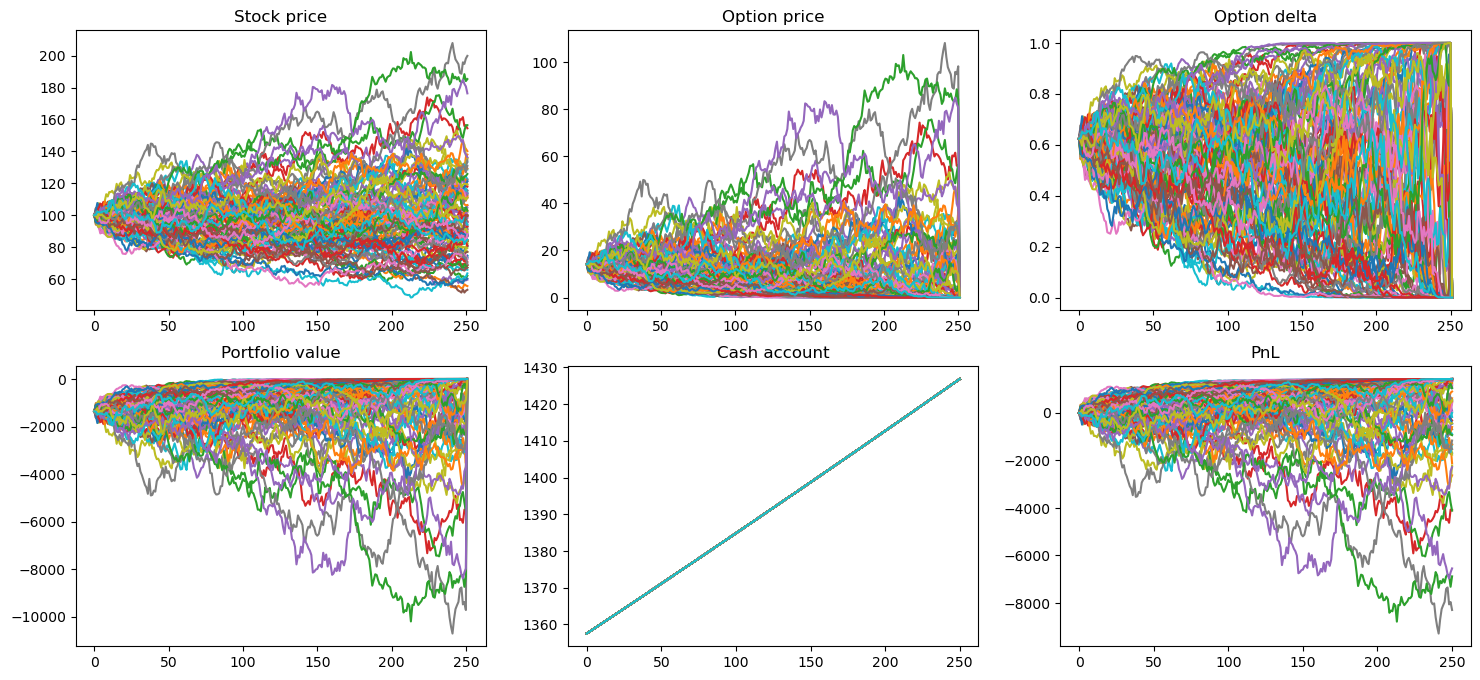

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(18, 8))

ax[0, 0].plot(path_list.T)
ax[0, 0].set_title('Stock price')

ax[0, 1].plot(option_values)
ax[0, 1].set_title('Option price')

ax[0, 2].plot(deltas)
ax[0, 2].set_title('Option delta')

ax[1, 0].plot(portfolio)
ax[1, 0].set_title('Portfolio value')

ax[1, 1].plot(cash[:-1])
ax[1, 1].set_title('Cash account')

ax[1, 2].plot(pnl[:-1])
ax[1, 2].set_title('PnL')

plt.show()

today:  January 3rd, 2023


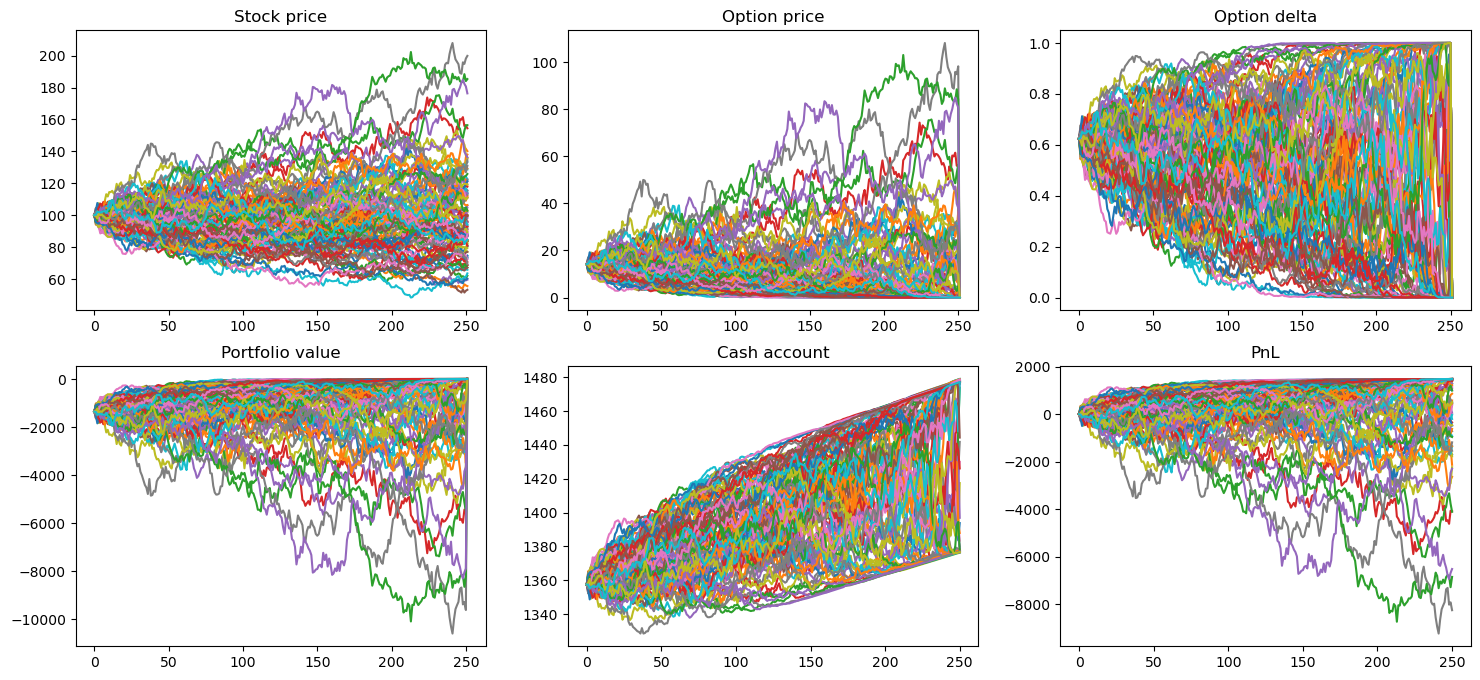

In [19]:
# 动态对冲模拟

ql_calendar.set_today(start_date)
stock_1.set_prices(S0)

# 初始化数组
dt = 1 / steps
time_points = np.arange(0, 1 + dt, dt)
portfolio = np.zeros((steps+1, paths))
cash = np.zeros((steps+1, paths))
option_values = np.zeros((steps+1, paths))
deltas = np.zeros((steps+1, paths))
pnl = np.zeros((steps+1, paths))

# 初始计算
option_values[0] = options.NPV()['NPV']
deltas[0] = options.delta()['delta']
cash[0] = option_values[0] * 100 - deltas[0] * S0
portfolio[0] = -option_values[0] * 100 + deltas[0] * S0

all_trade_dates = [ql_calendar.today]
for t in range(1, steps):
    # 设置价格
    ql_calendar.to_next_trading_date()
    # print(ql_calendar.today)
    all_trade_dates.append(ql_calendar.today)
    
    stock_price = path_list[:, t]
    stock_1.set_prices(stock_price)
    #
    option_values[t] = options.NPV()['NPV']

    new_delta = options.delta()['delta']
    deltas[t] = new_delta
    portfolio[t] = - option_values[t] * 100 + deltas[t] * stock_price

    cash[t] = cash[t - 1] * np.exp(r * dt) - (new_delta - deltas[t - 1]) * stock_price
    
    # 计算PnL
    pnl[t] = portfolio[t] + cash[t]

fig, ax = plt.subplots(2, 3, figsize=(18, 8))

ax[0, 0].plot(path_list.T)
ax[0, 0].set_title('Stock price')

ax[0, 1].plot(option_values)
ax[0, 1].set_title('Option price')

ax[0, 2].plot(deltas)
ax[0, 2].set_title('Option delta')

ax[1, 0].plot(portfolio)
ax[1, 0].set_title('Portfolio value')

ax[1, 1].plot(cash[:-1])
ax[1, 1].set_title('Cash account')

ax[1, 2].plot(pnl[:-1])
ax[1, 2].set_title('PnL')

plt.show()